## Decision Analysis - Project 1

Authors:
* Szudzik Oskar, 148245
* Moras Krystian, 148243

# Dataset

**Q**: What is the domain of the problem about?  
**A:** Apartments for rent in Poznań

**Q**: What is the source of the data?  
**A:** Otodom

**Q**: What is the point of view of the decision maker? 
**A:** Student looking for an apartment close to Politechnika and gyms

**Q**: What is the number of alternatives considered? Were there more of them in the original data set?  
**A:** 14

**Q**: Describe one of the alternatives considered (give its name, evaluations, specify preferences for this  
alternative)  
**A:** 

name: "2 niezależne pokoje. Balkon. Nowy blok. Blisko PST"

price: 2350

area: 40m^2

aesthetics: 7

transit: 40

gyms nearby: 7

**Q**: What is the number of criteria considered? Were there more of them in the original data set?  
**A:** 5, we made our own data set

**Q**: What is the origin of the various criteria? (catalog parameter / created by the decision maker - how?)  
**A:**
price : given by the landlord

area : given by the landlord

aesthetics : self-evaluated by decision makers on scale 0-10

transit : distance between apartment and politechnika in minutes by public transit, provided by google maps

gyms nearby: number of gyms in neighborhood, distance < 2km, google maps

**Q**: What are the domains of the individual criteria (discrete / continuous)? Note: in the case of continuous 
domains, specify the range of the criterion’s variability, in the case of others: list the values. What is  
the nature (gain / cost) of the individual criteria?  
**A:** 
price : continuous, 1700,8000

area : continuous, 32.5,78

aesthetics : discrete, 2,10

transit : continuous, 17,51

gyms nearby : discrete, 1,10

**Q**:Are all criteria of equal importance (should they have the same ”weights”)? If not, can the relative  
importance of the criteria under consideration be expressed in terms of weights? In this case, estimate  
the weights of each criterion on a scale of 1 to 10. Are there any criteria among the criteria that are  
completely or almost invalid / irrelevant?  
**A:**
importance (weight) : price (0.37) > aesthetics (0.27) > area (0.17) > transit (0.15) > gyms nearby (0.05)

we reduced the dataset to only relevant criteria

**Q**: Which of the considered alternatives (provide name and values on individual criteria) seems to be the  
best / definitely better than the others? Is it determined by one reason (e.g. definitely the lowest  
price) or rather the overall value of the criteria? Does this alternative still have any weaknesses? 

**A:**

Low price, good aesthetics and not too far, also there is at least one gym available

In [30]:
import pandas as pd
df = pd.read_csv('apartments.csv',decimal=",")
df.iloc[[9]]

,link,price,address,directions,area,aesthetics,commutation,gym_num
9,https://www.otodom.pl//pl/oferta/nowe-2-pokojo...,2350,"Poznań, Starołęka, ul. Wagrowska",https://www.google.com/maps/dir/Centrum%20Wyk%...,41.0,8.0,23,1


**Q**: Which of the considered alternatives (provide name and values on individual criteria) seems to be the  
worst / definitely worse than the others? Is it determined by one reason (e.g. definitely the highest  
price), or rather the overall value of the criteria? Does this alternative still have any strengths?
**A:**

Even though it's rather cheap and close, the value on aesthetics is too low

In [31]:
df.iloc[[6]]

,link,price,address,directions,area,aesthetics,commutation,gym_num
6,https://www.otodom.pl//pl/oferta/mieszkanie-la...,1900,"Poznań, Łazarz, ul. Głogowska 65",https://www.google.com/maps/dir/Centrum%20Wyk%...,48.0,2.0,28,1


**Q**: What should the theoretically best alternative look like in your opinion? Is it a small advantage on  
many criteria, or rather a strong advantage on few (but key) criteria? Which?  
**A:**

Under 2500 zł, close to Politechnika, with 3-4 gyms to choose for, aesthetically pleasing (>8), and spacious (>50m^2?) 

Small advantage on all criteria


In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('apartments.csv',decimal=",")
df

,link,price,address,directions,area,aesthetics,commutation,gym_num
0,https://www.otodom.pl//pl/oferta/2-niezalezne-...,2350,"Poznań, Piątkowo, ul. Zygmunta Wojciechowskiego",https://www.google.com/maps/dir/Centrum%20Wyk%...,40.0,7.0,40,7
1,https://www.otodom.pl//pl/oferta/2pokojowe-ata...,2300,"Poznań, Piątkowo, osiedle Stefana Batorego",https://www.google.com/maps/dir/Centrum%20Wyk%...,50.0,3.0,42,6
2,https://www.otodom.pl//pl/oferta/nowe-mieszkan...,2800,"Poznań, Grunwald, ul. Ptasia",https://www.google.com/maps/dir/Centrum%20Wyk%...,49.0,6.0,39,9
3,https://www.otodom.pl//pl/oferta/mieszkanie-2-...,1700,"Poznań, Naramowice, ul. Radłowa",https://www.google.com/maps/dir/Centrum%20Wyk%...,32.5,5.0,44,2
4,https://www.otodom.pl//pl/oferta/nowe-komforto...,2350,"Podolany, Poznań, Poznań",https://www.google.com/maps/dir/Centrum%20Wyk%...,43.0,7.5,51,4
5,https://www.otodom.pl//pl/oferta/centrum-przy-...,2500,"Poznań, Centrum, ul. Franciszka Ratajczaka 21",https://www.google.com/maps/dir/Centrum%20Wyk%...,45.0,7.0,19,3
6,https://www.otodom.pl//pl/oferta/mieszkanie-la...,1900,"Poznań, Łazarz, ul. Głogowska 65",https://www.google.com/maps/dir/Centrum%20Wyk%...,48.0,2.0,28,1
7,https://www.otodom.pl//pl/oferta/luksusowy-apa...,8000,"Poznań, Chwaliszewo, ul. Tylne Chwaliszewo",https://www.google.com/maps/dir/Centrum%20Wyk%...,78.0,10.0,17,2
8,https://www.otodom.pl//pl/oferta/paryski-szyk-...,2500,"Poznań, Górna Wilda, ul. Różana 21",https://www.google.com/maps/dir/Centrum%20Wyk%...,54.0,6.0,20,2
9,https://www.otodom.pl//pl/oferta/nowe-2-pokojo...,2350,"Poznań, Starołęka, ul. Wagrowska",https://www.google.com/maps/dir/Centrum%20Wyk%...,41.0,8.0,23,1


Normalized data from google sheet: https://docs.google.com/spreadsheets/d/1VsbFXimgnc1h46ZDxTlhOrBB5JrDE3e36HZFIbUKY0M/edit?usp=sharing

In [35]:
alternatives = df[["price","area","aesthetics","commutation","gym_num"]]
alternatives

,price,area,aesthetics,commutation,gym_num
0,2350,40.0,7.0,40,7
1,2300,50.0,3.0,42,6
2,2800,49.0,6.0,39,9
3,1700,32.5,5.0,44,2
4,2350,43.0,7.5,51,4
5,2500,45.0,7.0,19,3
6,1900,48.0,2.0,28,1
7,8000,78.0,10.0,17,2
8,2500,54.0,6.0,20,2
9,2350,41.0,8.0,23,1


In [80]:
def get_alternatives():
    df = pd.read_csv('apartments.csv',decimal=",")
    return df[["price","area","aesthetics","commutation","gym_num"]]

### PROMETHEE I

For both PROMETHEE methods the prefferential information are as follows:
* alternatives with last column specified as alternative's ID
* INDIFFERENCE_THRESHOLDS = 'q's, thresholds of indifference for each criterion
* PREFERENCE_THRESHOLDS = 'p's, thresholds of preference for each criterion
* criteria - 1 means its type is gain, -1 means cost
* weights - weights of each criterion (sum of weights == 1)

In [45]:
INDIFFERENCE_THRESHOLDS = [200, 5, 1, 5, 3]
PREFERENCE_THRESHOLDS = [400, 10, 3, 10, 5]

In [46]:
alternatives['id'] = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']
alternatives

C:\Users\Admin\AppData\Local\Temp\ipykernel_22508\311432500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alternatives['id'] = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']


,price,area,aesthetics,commutation,gym_num,id
0,2350,40.0,7.0,40,7,01
1,2300,50.0,3.0,42,6,02
2,2800,49.0,6.0,39,9,03
3,1700,32.5,5.0,44,2,04
4,2350,43.0,7.5,51,4,05
5,2500,45.0,7.0,19,3,06
6,1900,48.0,2.0,28,1,07
7,8000,78.0,10.0,17,2,08
8,2500,54.0,6.0,20,2,09
9,2350,41.0,8.0,23,1,10


In [47]:
def marginal_pref_index(alternatives, criteria, i, j, k):
    if criteria[k] * (alternatives[i, k] - alternatives[j, k]) > PREFERENCE_THRESHOLDS[k]:
        preference = 1
    elif criteria[k] * (alternatives[i, k] - alternatives[j, k]) <= INDIFFERENCE_THRESHOLDS[k]:
        preference = 0
    else:
        preference = (criteria[k] * (alternatives[i, k] - alternatives[j, k]) - INDIFFERENCE_THRESHOLDS[k]) / (PREFERENCE_THRESHOLDS[k] - INDIFFERENCE_THRESHOLDS[k])
    return preference


def calc_comp_pref_matrix(alternatives, weights, criteria):
    n, m = alternatives.shape
    pref_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                pref_matrix[i, j] = 0
            else:                
                pref_matrix[i, j] = sum([weights[k] * marginal_pref_index(alternatives, criteria, i, j, k) for k in range(m)])
    return pref_matrix


def calc_outranking_flows(num_of_alts, pref_matrix):
    outranking_flow_pos = np.zeros(num_of_alts)
    outranking_flow_neg = np.zeros(num_of_alts)
    
    for n in range(num_of_alts):
        outranking_flow_pos[n] = sum(pref_matrix[n, :])
        outranking_flow_neg[n] = sum(pref_matrix[:, n])
    return outranking_flow_pos, outranking_flow_neg

In [48]:
def search_pattern_in_second_list(pos_keys, neg_keys, pos):
    seq = []
    for neg in range(len(neg_keys)):
        counter = 0
        while pos_keys[pos+counter] == neg_keys[neg+counter]:
            seq.append(pos_keys[pos+counter])
            counter += 1
            if neg+counter >= len(neg_keys) or pos+counter >= len(pos_keys):
                return seq
        if counter > 0:
            return seq
    return seq


def check_for_pattern(pos_keys, neg_keys):
    temp_vars = {}
    new_pos = []
    already_changed = set()
    
    for pos in range(len(pos_keys)):
        seq = []
        if pos_keys[pos] in already_changed:
            continue

        seq = search_pattern_in_second_list(pos_keys, neg_keys, pos)
        
        if len(seq) > 1:
            new_temp = len(temp_vars.keys())
            temp_vars[new_temp] = seq
            new_pos.append(new_temp)
            for element in seq:
                already_changed.add(element)
        else:
            new_pos.append(pos_keys[pos])
    return new_pos, temp_vars

In [49]:
def get_same_level_alts(pos_keys, neg_keys, pos):
    level = [pos_keys[pos]]
    if pos_keys[pos] == neg_keys[pos]:
        return level
    level.append(neg_keys[pos])
    for neg in range(pos, len(neg_keys)):
        counter = 1
        if neg+counter >= len(neg_keys) or pos+counter >= len(pos_keys):
            return level
        while pos_keys[pos+counter] != neg_keys[neg+counter]:
            if pos_keys[pos+counter] in level and neg_keys[neg+counter]:
                return level
            if pos_keys[pos+counter] not in level:
                level.append(pos_keys[pos+counter])
            if neg_keys[neg+counter] not in level:
                level.append(neg_keys[neg+counter])
            counter += 1
            if neg+counter >= len(neg_keys) or pos+counter >= len(pos_keys):
                return level
        return level

def merge(pos_keys, neg_keys):
    ranking = []
    already_in_ranking = set()
    
    for pos in range(len(pos_keys)):
        if pos_keys[pos] in already_in_ranking:
            continue
        level = get_same_level_alts(pos_keys, neg_keys, pos)
        ranking.append(level)
        for element in level:
            already_in_ranking.add(element)
    return ranking

In [64]:
def unzip_ranking(ranking, pos_temp_vars):
    unzipped_ranking = []
    already_there = set()
    for level in ranking:
        lev = []
        for element in level:
            if element in pos_temp_vars.keys():
                if element in already_there:
                    continue
                else:
                    lev.append(tuple(x for x in pos_temp_vars[element]))
                    already_there.add(element)
            else:
                if element in already_there:
                    continue
                else:
                    lev.append(element)
                    already_there.add(element)
        unzipped_ranking.append(lev)

    return unzipped_ranking


def merge_rankings(pos_flow, neg_flow):
    pos_keys = list(pos_flow.keys())
    neg_keys = list(neg_flow.keys())

    new_pos, pos_temp_vars = check_for_pattern(pos_keys, neg_keys)
    new_neg, neg_temp_vars = check_for_pattern(neg_keys, pos_keys)
    
    ranking = merge(new_pos, new_neg)
    return unzip_ranking(ranking, pos_temp_vars)

In [65]:
def produce_ranking(outranking_flow_pos, outranking_flow_neg, names):
    pos_dict = {n: v for n, v in zip(names, outranking_flow_pos)}
    pos_dict = dict(sorted(pos_dict.items(), key=lambda item: -item[1]))
    neg_dict = {n: v for n, v in zip(names, outranking_flow_neg)}
    neg_dict = dict(sorted(neg_dict.items(), key=lambda item: item[1]))

    return merge_rankings(pos_dict, neg_dict)

In [66]:
def promethee(df, criteria, weights):
    alternatives = df.iloc[:, :-1].values
    ids = df.iloc[:, -1].values

    pref_matrix = calc_comp_pref_matrix(alternatives, weights, criteria)
    outranking_flow_pos, outranking_flow_neg = calc_outranking_flows(len(ids), pref_matrix)

    ranking = produce_ranking(outranking_flow_pos, outranking_flow_neg, ids)

    return ranking

## IMPORTANT

Additional information about naming convention in the PROMETHEE1 problem - to solve a problem of "levels" when two or more alternatives are indifferent and a problem of sequences (e.g. case from labs. - when a give sequence of alternatives is indifferent with another alternative/sequence) we introduce bracket system.
* All levels are in one big square bracket because of them being a list.
* Each level has its own square bracket, and the most preffered are starting on the left.
* Sequences are represented as a normal bracket (sequences are read left to right as well)

lecture example for debugging purposes

lecture example - flow and pref matrix seem okay - theres a small difference when calculating

In [67]:
criteria = [1, 1, -1]
weights = [0.3, 0.2, 0.5]
example_df = pd.DataFrame({'g1': [98, 58, 66, 74, 80, 82],
                           'g2': [8, 0, 5, 3, 7, 10],
                           'g3': [400, 800, 1000, 600, 200, 600],
                           'names': ['ITA', 'BEL', 'GER', 'SWE', 'AUT', 'FRA']})
INDIFFERENCE_THRESHOLDS = [0, 0, 100]
PREFERENCE_THRESHOLDS = [0, 2, 300]

promethee(example_df, criteria, weights)

[['AUT', 'ITA'], [('FRA', 'SWE')], ['GER', 'BEL']]

Above example we could translate to more convenient [AUT OR ITA] -> FRA -> SWE -> [GER OR BEL]



our dataset


In [68]:
INDIFFERENCE_THRESHOLDS = [200, 5, 1, 5, 3]
PREFERENCE_THRESHOLDS = [400, 10, 3, 10, 5]
criteria = [-1, 1, 1, 1, 1]
weights = [0.51, 0.28, 0.08, 0.08, 0.05]

promethee(alternatives, criteria, weights)

[['07', '05', ('04', '14'), '08', '09'],
 ['02'],
 ['01', '12'],
 ['11', '10'],
 ['03', '13', '06']]

### PROMETHEE II

In [69]:
def calc_flow_overall(outranking_flow_pos, outranking_flow_neg, names):    
    flow_overall = {k: v for k, v in zip(names, outranking_flow_pos)}
    for k, v in zip(names, outranking_flow_neg):
        flow_overall[k] -= v 

    flow_overall = dict(sorted(flow_overall.items(), key=lambda item: -item[1]))

    return flow_overall

In [70]:
def promethee2(df, criteria, weights):
    alternatives = df.iloc[:, :-1].values
    ids = df.iloc[:, -1].values

    pref_matrix = calc_comp_pref_matrix(alternatives, weights, criteria)
    outranking_flow_pos, outranking_flow_neg = calc_outranking_flows(len(ids), pref_matrix)
    flow_overall = calc_flow_overall(outranking_flow_pos, outranking_flow_neg, ids)

    return flow_overall

In [71]:
INDIFFERENCE_THRESHOLDS = [200, 5, 1, 5, 3]
PREFERENCE_THRESHOLDS = [400, 10, 3, 10, 5]
criteria = [-1, 1, 1, 1, 1]
weights = [0.36, 0.28, 0.23, 0.08, 0.05]

promethee2(alternatives, criteria, weights)

{'14': 2.5635000000000003,
 '05': 1.2695000000000007,
 '07': 0.9699999999999998,
 '08': 0.4714999999999989,
 '04': 0.2214999999999998,
 '09': 0.21550000000000136,
 '13': -0.08699999999999974,
 '01': -0.2070000000000003,
 '11': -0.5185000000000008,
 '10': -0.6260000000000003,
 '02': -0.6309999999999998,
 '12': -0.7995000000000001,
 '06': -1.013,
 '03': -1.8295000000000008}

Both methods place on top generally the same alternatives, but depending on a version they change their placement (e.g. PROMETHEE1 04->14, PROMETHEE2 14->4).
We agree that they provide well enough suggestions for a decent apartment.

# ELECTRE

In [50]:
def concordance_function(difference,indifference,preference,gain):
    if gain:
        if difference >= -indifference:
            return 1
        elif difference < -preference:
            return 0
        else:
            return (preference + difference) / (preference-indifference)
    else:
        if difference <= indifference:
            return 1
        elif difference > preference:
            return 0
        else:
            return (preference-difference) / (preference-indifference)


def calculate_marginal_concordance(alternatives, boundary_profiles, indifference_thresholds, preference_thresholds, gain,concordance_function=concordance_function):
    # Calculate marginal concordance for each alternative and boundary profile
    # Arguments:
    #   alternatives: pandas dataframe with alternatives
    #   boundary_profiles: pandas dataframe with boundary profiles
    #   indifference_thresholds: list of indifference thresholds for each boundary profile
    #   preference_thresholds: list of preference thresholds for each boundary profile
    #   gain: list of boolean values indicating whether the criterion is gain or cost
    # Returns:
    #   marginal_concordance: numpy array with marginal concordance in the shape of (number of criteria, number of alternatives, number of boundary profiles)

    marginal_concordance_alt_to_profile = np.zeros((len(boundary_profiles),len(alternatives),len(alternatives.columns),))
    marginal_concordance_profile_to_alt = np.zeros((len(boundary_profiles),len(alternatives),len(alternatives.columns),))

    for i in range(len(alternatives)):
        for j in range(len(boundary_profiles)):
            for k in range(len(alternatives.columns)):
                difference = alternatives.iloc[i,k] - boundary_profiles.iloc[j,k]
                
                indifference = indifference_thresholds[j][k]
                preference = preference_thresholds[j][k]
                marginal_concordance_alt_to_profile[j,i,k] = concordance_function(difference, indifference, preference, gain[k])
                marginal_concordance_profile_to_alt[j,i,k] = concordance_function(-difference, indifference, preference, gain[k])

    return marginal_concordance_alt_to_profile,marginal_concordance_profile_to_alt

def test_marginal_concordance():

    
    test_alternatives = pd.DataFrame([[90,86,46,30],
    [40,90,14,48],
    [94,100,40,36],
    [78,76,30,50],
    [60,60,30,30],
    [64,72,12,46],
    [62,88,22,48],
    [70,30,12,12]]).astype(float)
    test_boundary_profiles = pd.DataFrame( [[64,61,32,32],
[86,84,43,43]]).astype(float)
    test_indifference_thresholds = [[2,2,0,0],[3,2,0,0]]
    test_preference_thresholds = [[6,5,2,2],[7,8,2,2]]

    test_gains = [True,True,True,True]

    marginal_concordance_alt_to_profile, marginal_concordance_profile_to_alt = calculate_marginal_concordance(test_alternatives, test_boundary_profiles, test_indifference_thresholds, test_preference_thresholds, test_gains)

    concordance_matrix_alt_to_profile = np.array(
        [
        [1,1,1,0],
        [0,1,0,1],
        [1,1,1,1],
        [1,1,0,1],
        [0.5,1,0,0],
        [1,1,0,1],
        [1,1,0,1],
        [1,0,0,0]
        ],
    )
    concordance_matrix_profile_to_alt = np.array(
        [
        [0,0,0,1],
        [1,0,1,0],
        [0,0,0,0],
        [0,0,1,0],
        [1,1,1,1],
        [1,0,1,0],
        [1,0,1,0],
        [0,1,1,1]
        ]
    )
    assert np.allclose(marginal_concordance_alt_to_profile[0], concordance_matrix_alt_to_profile, atol=0.01)
    assert np.allclose(marginal_concordance_profile_to_alt[0], concordance_matrix_profile_to_alt, atol=0.01)

    return marginal_concordance_alt_to_profile, marginal_concordance_profile_to_alt

test_marginal_concordance()

(array([[[1. , 1. , 1. , 0. ],
         [0. , 1. , 0. , 1. ],
         [1. , 1. , 1. , 1. ],
         [1. , 1. , 0. , 1. ],
         [0.5, 1. , 0. , 0. ],
         [1. , 1. , 0. , 1. ],
         [1. , 1. , 0. , 1. ],
         [1. , 0. , 0. , 0. ]],
 
        [[1. , 1. , 1. , 0. ],
         [0. , 1. , 0. , 1. ],
         [1. , 1. , 0. , 0. ],
         [0. , 0. , 0. , 1. ],
         [0. , 0. , 0. , 0. ],
         [0. , 0. , 0. , 1. ],
         [0. , 1. , 0. , 1. ],
         [0. , 0. , 0. , 0. ]]]),
 array([[[0.        , 0.        , 0.        , 1.        ],
         [1.        , 0.        , 1.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 1.        , 0.        ],
         [1.        , 1.        , 1.        , 1.        ],
         [1.        , 0.        , 1.        , 0.        ],
         [1.        , 0.        , 1.        , 0.        ],
         [0.        , 1.        , 1.        , 1.        ]],
 
        [[0.75      , 1

In [51]:
def discordance_function(difference, veto, preference, gain):
    if gain:
        if difference <= -veto:
            return 1
        elif difference >= -preference:
            return 0
        else :
            return (-difference - preference) / (veto-preference)
    else:
        if difference >= veto:
            return 1
        elif difference <= preference:
            return 0
        else:
            return (veto - difference) / (veto-preference)

def calculate_marginal_discordance(alternatives,boundary_profiles,preference_thresholds,veto_thresholds,gain,discordance_function=discordance_function):

    marginal_discordance_alt_to_profile = np.zeros((len(boundary_profiles),len(alternatives),len(alternatives.columns),))
    marginal_discordance_profile_to_alt = np.zeros((len(boundary_profiles),len(alternatives),len(alternatives.columns),))

    for i in range(len(alternatives)):
        for j in range(len(boundary_profiles)):
            for k in range(len(alternatives.columns)):
                difference = alternatives.iloc[i,k] - boundary_profiles.iloc[j,k]
                
                veto = veto_thresholds[j][k]
                preference = preference_thresholds[j][k]
                marginal_discordance_alt_to_profile[j,i,k] = discordance_function(difference, veto, preference, gain[k])
                marginal_discordance_profile_to_alt[j,i,k] = discordance_function(-difference, veto, preference, gain[k])

    return marginal_discordance_alt_to_profile,marginal_discordance_profile_to_alt

def test_marginal_discordance():

    test_alternatives = pd.DataFrame([[90,86,46,30],
    [40,90,14,48],
    [94,100,40,36],
    [78,76,30,50],
    [60,60,30,30],
    [64,72,12,46],
    [62,88,22,48],
    [70,30,12,12]]).astype(float)
    test_boundary_profiles = pd.DataFrame( [[64,61,32,32],
[86,84,43,43]]).astype(float)
    test_veto_thresholds = [[20,24,np.inf,np.inf],[20,25,np.inf,np.inf]]
    test_preference_thresholds = [[6,5,2,2],[7,8,2,2]]

    test_gains = [True,True,True,True]

    discordance_alt_to_profile = np.array([
        [0,0,0,0],
        [1,0,0,0],
        [0,0,0,0],
        [0.07,0,0,0],
        [1,0.94,0,0],
        [1,0.23,0,0],
        [1,0,0,0],
        [0.69,1,0,0]
    ])
    discordance_profile_to_alt = np.array([
        [1,1,0,0],
        [0,1,0,0],
        [1,1,0,0],
        [0.57,0.52,0,0],
        [0,0,0,0],
        [0,0.31,0,0],
        [0,1,0,0],
        [0,0,0,0]
    ])

    marginal_discordance_alt_to_profile, marginal_discordance_profile_to_alt = calculate_marginal_discordance(test_alternatives, test_boundary_profiles, test_preference_thresholds, test_veto_thresholds,test_gains)

    assert np.allclose(marginal_discordance_alt_to_profile[1], discordance_alt_to_profile, atol=0.01)
    assert np.allclose(marginal_discordance_profile_to_alt[0], discordance_profile_to_alt, atol=0.01)

    return marginal_discordance_alt_to_profile, marginal_discordance_profile_to_alt
    
test_marginal_discordance()

(array([[[0.        , 0.        , 0.        , 0.        ],
         [1.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 1.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        , 0.        ],
         [1.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.07692308, 0.        , 0.        , 0.        ],
         [1.        , 0.94117647, 0.        , 0.        ],
         [1.        , 0.23529412, 0.        , 0.        ],
         [1.        , 0.        , 0.        , 0.        ],
         [0.69230769, 1.        , 0.        , 0.        ]]]),
 array([[[1.        , 1.        , 0.        , 0.  

In [52]:
def calculate_comprehensive_concordance(concordance_matrix_alt_to_profile, concordance_matrix_profile_to_alt,weights):

    # weighted average of concordances for each alternative

    comprehensive_concordance_alt_to_profile = np.average(concordance_matrix_alt_to_profile, axis=2, weights=weights)
    comprehensive_concordance_profile_to_alt = np.average(concordance_matrix_profile_to_alt, axis=2, weights=weights)

    return comprehensive_concordance_alt_to_profile.T, comprehensive_concordance_profile_to_alt.T

def test_comprehensive_concordance():

    concordance_matrix_alt_to_profile, concordance_matrix_profile_to_alt = test_marginal_concordance()

    weights = [0.4,0.3,0.25,0.05]

    comprehensive_concordance_alt_to_profile, comprehensive_concordance_profile_to_alt = calculate_comprehensive_concordance(concordance_matrix_alt_to_profile, concordance_matrix_profile_to_alt,weights)
    return comprehensive_concordance_alt_to_profile, comprehensive_concordance_profile_to_alt

test_comprehensive_concordance()

(array([[0.95, 0.95],
        [0.35, 0.35],
        [1.  , 0.7 ],
        [0.75, 0.05],
        [0.5 , 0.  ],
        [0.75, 0.05],
        [0.75, 0.35],
        [0.4 , 0.  ]]),
 array([[0.05, 0.65],
        [0.65, 0.75],
        [0.  , 0.3 ],
        [0.25, 0.95],
        [1.  , 1.  ],
        [0.65, 0.95],
        [0.65, 0.85],
        [0.6 , 1.  ]]))

In [53]:
def calculate_outranking_credibility(comprehensive_concordance,marginal_discordance):
    # Returns array of outranking credibility for each alternative
    # outranking[alternative][boundary profile][0] = outranking credibility of alternative to boundary profile
    # outranking[alternative][boundary profile][1] = outranking credibility of boundary profile to alternative
    outrankings = np.zeros((len(comprehensive_concordance[0]),len(comprehensive_concordance[0][0]),2))
    for i in range(len(comprehensive_concordance[0])): # numver of alternatives
        for j in range(len(comprehensive_concordance[0][0])): # number of boundary profiles
            outranking = [comprehensive_concordance[0][i][j], comprehensive_concordance[1][i][j]]
            for k in range(len(marginal_discordance[0])): # number of criteria
                
                if comprehensive_concordance[0][i][j] < marginal_discordance[0][j][i][k]: # alt_to_profile
                    outranking[0] *= (1-marginal_discordance[0][j][i][k])/(1-comprehensive_concordance[0][i][j])
                if comprehensive_concordance[1][i][j] < marginal_discordance[1][j][i][k]: # profile_to_alt
                    outranking[1] *= (1-marginal_discordance[1][j][i][k])/(1-comprehensive_concordance[1][i][j])
            outrankings[i][j] = outranking
    
    return outrankings

def test_outranking_credibility():

    comprehensive_concordance = test_comprehensive_concordance()
    marginal_discordance = test_marginal_discordance()

    outrankings = calculate_outranking_credibility(comprehensive_concordance,marginal_discordance)
    test_outrankings = np.array([[0.95,0],[0.95,0.65]])
    assert np.allclose(outrankings[0], test_outrankings, atol=0.01)
    return outrankings
test_outranking_credibility()

array([[[0.95      , 0.        ],
        [0.95      , 0.65      ]],

       [[0.        , 0.        ],
        [0.        , 0.75      ]],

       [[1.        , 0.        ],
        [0.7       , 0.22689076]],

       [[0.75      , 0.09022556],
        [0.048583  , 0.95      ]],

       [[0.5       , 1.        ],
        [0.        , 1.        ]],

       [[0.75      , 0.65      ],
        [0.        , 0.95      ]],

       [[0.75      , 0.        ],
        [0.        , 0.85      ]],

       [[0.        , 0.6       ],
        [0.        , 1.        ]]])

In [54]:
def preference_aggregation(aPb,bPa):
    if aPb and not bPa:
        return 1 # a is preferred to b
    if not aPb and bPa:
        return -1 # b is preferred to a
    if aPb and bPa: 
        return 0 # indifferent
    if not aPb and not bPa:
        return None # incomparable

def transform_outranking_to_preference(outrankings,credibility_threshold=0.65):

    outranking_preference = np.zeros((len(outrankings),len(outrankings[0])))
    for i in range(len(outrankings)): # alternatives
        for j in range(len(outrankings[0])): # boundary profiles
            outranking_preference[i][j] = preference_aggregation(outrankings[i][j][0] >= credibility_threshold, outrankings[i][j][1] >= credibility_threshold)
    return outranking_preference

def test_transform_outranking_to_preference():
    outrankings = test_outranking_credibility()
    outranking_preference = transform_outranking_to_preference(outrankings)
    assert np.allclose(outranking_preference[:,0:1].flatten(), [[1,np.nan,1,1,-1,0,1,np.nan]], equal_nan=True)
    return outranking_preference

preference = test_transform_outranking_to_preference()
print(preference[:,0:1])
print(preference[:,1:2])

[[ 1.]
 [nan]
 [ 1.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 1.]
 [nan]]
[[ 0.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


In [55]:
def class_assignment(preference_matrix,num_classes, pessimistic=True):
    if pessimistic:
        # fill array of size len(preference_matrix) with max value of 2
        classes = np.full(len(preference_matrix),num_classes)

    else:
        classes = np.ones(len(preference_matrix))


    for j,a in enumerate(preference_matrix):
        if pessimistic:
            for i in range(len(a)-1,-1,-1):
                
                if a[i] >=0:
                    break
                classes[j]-=1
            
        else:
            for i in range(len(a)):
                if a[i] == -1:
                    break
                classes[j]+=1
                
    return classes

def test_class_assignment():

    preference = test_transform_outranking_to_preference()
    classes_pess = class_assignment(preference,3,True)
    classes_opt = class_assignment(preference,3,False)
    assert np.allclose(classes_pess, [3,1,3,2,1,2,2,1])
    assert np.allclose(classes_opt, [3,2,3,2,1,2,2,2])
    return classes_pess, classes_opt

test_class_assignment()

(array([3, 1, 3, 2, 1, 2, 2, 1]), array([3., 2., 3., 2., 1., 2., 2., 2.]))

In [56]:
def electre_tri_b(alternatives,boundary_profiles,criteria_is_gain,indifference_thresholds,preference_thresholds,veto_thresholds,weights,pessimistic=True):
    # Returns array of classes for each alternative

    # Calculate concordance and discordance matrices
    concordance_matrix_alt_to_profile, concordance_matrix_profile_to_alt = calculate_marginal_concordance(alternatives,boundary_profiles,indifference_thresholds,preference_thresholds,criteria_is_gain)
    discordance_matrix_alt_to_profile, discordance_matrix_profile_to_alt = calculate_marginal_discordance(alternatives,boundary_profiles,preference_thresholds,veto_thresholds,criteria_is_gain)

    # Calculate comprehensive concordance
    comprehensive_concordance = calculate_comprehensive_concordance(concordance_matrix_alt_to_profile,concordance_matrix_profile_to_alt,weights)

    # Calculate outranking credibility
    outrankings = calculate_outranking_credibility(comprehensive_concordance,[discordance_matrix_alt_to_profile,discordance_matrix_profile_to_alt])

    # Transform outranking credibility to preference
    outranking_preference = transform_outranking_to_preference(outrankings)

    # Assign classes
    classes = class_assignment(outranking_preference,len(boundary_profiles)+1,pessimistic)

    
    return classes

def test_electre_tri_b():
    
    test_alternatives = pd.DataFrame([[90,86,46,30],
    [40,90,14,48],
    [94,100,40,36],
    [78,76,30,50],
    [60,60,30,30],
    [64,72,12,46],
    [62,88,22,48],
    [70,30,12,12]]).astype(float)
    test_boundary_profiles = pd.DataFrame( [[64,61,32,32],
[86,84,43,43]]).astype(float)
    test_veto_thresholds = [[20,24,np.inf,np.inf],[20,25,np.inf,np.inf]]
    test_preference_thresholds = [[6,5,2,2],[7,8,2,2]]
    test_indifference_thresholds = [[2,2,0,0],[3,2,0,0]]
    test_gains = [True,True,True,True]
    test_weights = [0.4,0.3,0.25,0.05]

    classes = electre_tri_b(test_alternatives,test_boundary_profiles,test_gains,test_indifference_thresholds,test_preference_thresholds,test_veto_thresholds,test_weights)
    assert np.allclose(classes, [3,1,3,2,1,2,2,1])
    return classes

test_electre_tri_b() 

array([3, 1, 3, 2, 1, 2, 2, 1])

In [57]:
results_to_class = {1:"Discard this",2:"Might consider",3:"Schedule an appointment",4:"I must have it"}

## Preferential Information

Initial values

In [58]:
boundary_profiles = pd.DataFrame([[2500,35,5,45,0],[2400,45,6,30,1],[2100,50,8,15,3]]) # TODO

######################### Price, Area, Aesthetics, Commutation, Gym number
INDIFFERENCE_THRESHOLDS = [[100,5,1,5,0],[100,5,1,5,0],[100,5,1,5,0]] # I feel indifferent when the difference is X
PREFERENCE_THRESHOLDS = [[200,10,2,15,1],[200,10,2,15,1],[200,10,2,15,1]] # I feel preference when the difference is X
VETO_THRESHOLDS = [[500,20,5,30,7],[500,20,5,30,7],[500,20,5,30,7]] # A is always better than B if the difference is X and there is no question about that
gain = [False, True, True, False, True]

WEIGHTS = [0.51,0.28,0.16,0.16,0.05] # SRF

### Boundary profiles

In [59]:
boundary_profiles.columns = ["price","area","aesthetics","commutation","gym_num"]
boundary_profiles

,price,area,aesthetics,commutation,gym_num
0,2500,35,5,45,0
1,2400,45,6,30,1
2,2100,50,8,15,3


#### Indifference, preference, veto thresholds

In [60]:
b0 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[0],PREFERENCE_THRESHOLDS[0],VETO_THRESHOLDS[0]],columns=boundary_profiles.columns)
b0["threshold"] = ["indifference","preference","veto"]
b0 = b0.set_index("threshold")

b1 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[1],PREFERENCE_THRESHOLDS[1],VETO_THRESHOLDS[1]],columns=boundary_profiles.columns)
b1["threshold"] = ["indifference","preference","veto"]
b1 = b1.set_index("threshold")

b2 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[2],PREFERENCE_THRESHOLDS[2],VETO_THRESHOLDS[2]],columns=boundary_profiles.columns)
b2["threshold"] = ["indifference","preference","veto"]
b2 = b2.set_index("threshold")

print("BOUNDARY PROFILE 0\n\n",b0)
print("BOUNDARY PROFILE 1\n\n",b1)
print("BOUNDARY PROFILE 2\n\n",b2)

BOUNDARY PROFILE 0

               price  area  aesthetics  commutation  gym_num
threshold                                                  
indifference    100     5           1            5        0
preference      200    10           2           15        1
veto            500    20           5           30        7
BOUNDARY PROFILE 1

               price  area  aesthetics  commutation  gym_num
threshold                                                  
indifference    100     5           1            5        0
preference      200    10           2           15        1
veto            500    20           5           30        7
BOUNDARY PROFILE 2

               price  area  aesthetics  commutation  gym_num
threshold                                                  
indifference    100     5           1            5        0
preference      200    10           2           15        1
veto            500    20           5           30        7


### Weights

In [61]:
pd.DataFrame([WEIGHTS],columns=boundary_profiles.columns)

,price,area,aesthetics,commutation,gym_num
0,0.51,0.28,0.16,0.16,0.05


### Comparison of results

#### Our analysis (benchmark)

In [62]:
results_df = get_alternatives()

In [63]:
alternatives = get_alternatives()
results = [4,2,1,3,2,3,1,1,4,4,1,2,3,1]
results_df["class_assignment"] = [results_to_class[x] for x in results]
results_df

,price,area,aesthetics,commutation,gym_num,class_assignment
0,2350,40.0,7.0,40,7,I must have it
1,2300,50.0,3.0,42,6,Might consider
2,2800,49.0,6.0,39,9,Discard this
3,1700,32.5,5.0,44,2,Schedule an appointment
4,2350,43.0,7.5,51,4,Might consider
5,2500,45.0,7.0,19,3,Schedule an appointment
6,1900,48.0,2.0,28,1,Discard this
7,8000,78.0,10.0,17,2,Discard this
8,2500,54.0,6.0,20,2,I must have it
9,2350,41.0,8.0,23,1,I must have it


#### Electre Tri-b Pessimistic vs Optimistic

In [64]:
alternatives = get_alternatives()
results = electre_tri_b(alternatives,boundary_profiles,gain,INDIFFERENCE_THRESHOLDS,PREFERENCE_THRESHOLDS,VETO_THRESHOLDS,WEIGHTS, pessimistic=True)
results = [results_to_class[x] for x in results]
results_df["class_assignment_pess"] = results
alternatives = get_alternatives()
results = electre_tri_b(alternatives,boundary_profiles,gain,INDIFFERENCE_THRESHOLDS,PREFERENCE_THRESHOLDS,VETO_THRESHOLDS,WEIGHTS, pessimistic=False)
results = [results_to_class[x] for x in results]
results_df["class_assignment_opt"] = results
alternatives[["class_assignment_pess","class_assignment_opt"]] = results_df[["class_assignment_pess","class_assignment_opt"]]
alternatives


,price,area,aesthetics,commutation,gym_num,class_assignment_pess,class_assignment_opt
0,2350,40.0,7.0,40,7,Schedule an appointment,Schedule an appointment
1,2300,50.0,3.0,42,6,Schedule an appointment,Schedule an appointment
2,2800,49.0,6.0,39,9,Discard this,Discard this
3,1700,32.5,5.0,44,2,Might consider,I must have it
4,2350,43.0,7.5,51,4,Schedule an appointment,Schedule an appointment
5,2500,45.0,7.0,19,3,Schedule an appointment,Schedule an appointment
6,1900,48.0,2.0,28,1,Schedule an appointment,I must have it
7,8000,78.0,10.0,17,2,Discard this,I must have it
8,2500,54.0,6.0,20,2,Schedule an appointment,Schedule an appointment
9,2350,41.0,8.0,23,1,Schedule an appointment,Schedule an appointment


#### Final Results

In [65]:
boundary_profiles = pd.DataFrame([[2500,35,5,45,0],[2400,45,6,30,1],[2100,50,8,15,3]]) # TODO

######################### Price, Area, Aesthetics, Commutation, Gym number
INDIFFERENCE_THRESHOLDS = [[100,5,1,15,0],[100,5,1,5,0],[100,5,0,0,0]] # I feel indifferent when the difference is X
PREFERENCE_THRESHOLDS = [[200,10,3,25,1],[300,10,3,15,1],[400,10,1,5,1]] # I feel preference when the difference is X
VETO_THRESHOLDS = [[500,20,5,30,7],[500,20,5,30,7],[500,20,5,30,7]] # A is always better than B if the difference is X and there is no question about that
gain = [False, True, True, False, True]

WEIGHTS = [0.37,0.17,0.27,0.15,0.05] 

In [66]:
b0 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[0],PREFERENCE_THRESHOLDS[0],VETO_THRESHOLDS[0]],columns=boundary_profiles.columns)
b0["threshold"] = ["indifference","preference","veto"]
b0 = b0.set_index("threshold")

b1 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[1],PREFERENCE_THRESHOLDS[1],VETO_THRESHOLDS[1]],columns=boundary_profiles.columns)
b1["threshold"] = ["indifference","preference","veto"]
b1 = b1.set_index("threshold")

b2 = pd.DataFrame([INDIFFERENCE_THRESHOLDS[2],PREFERENCE_THRESHOLDS[2],VETO_THRESHOLDS[2]],columns=boundary_profiles.columns)
b2["threshold"] = ["indifference","preference","veto"]
b2 = b2.set_index("threshold")

print("BOUNDARY PROFILE 0\n\n",b0)
print("BOUNDARY PROFILE 1\n\n",b1)
print("BOUNDARY PROFILE 2\n\n",b2)

BOUNDARY PROFILE 0

                 0   1  2   3  4
threshold                      
indifference  100   5  1  15  0
preference    200  10  3  25  1
veto          500  20  5  30  7
BOUNDARY PROFILE 1

                 0   1  2   3  4
threshold                      
indifference  100   5  1   5  0
preference    300  10  3  15  1
veto          500  20  5  30  7
BOUNDARY PROFILE 2

                 0   1  2   3  4
threshold                      
indifference  100   5  0   0  0
preference    400  10  1   5  1
veto          500  20  5  30  7


In [67]:
alternatives = get_alternatives()
results = electre_tri_b(alternatives,boundary_profiles,gain,INDIFFERENCE_THRESHOLDS,PREFERENCE_THRESHOLDS,VETO_THRESHOLDS,WEIGHTS, pessimistic=True)
results = [results_to_class[x] for x in results]
results_df["class_assignment_pess"] = results
alternatives = get_alternatives()
results = electre_tri_b(alternatives,boundary_profiles,gain,INDIFFERENCE_THRESHOLDS,PREFERENCE_THRESHOLDS,VETO_THRESHOLDS,WEIGHTS, pessimistic=False)
results = [results_to_class[x] for x in results]
results_df["class_assignment_opt"] = results
alternatives[["class_assignment","class_assignment_pess","class_assignment_opt"]] = results_df[["class_assignment","class_assignment_pess","class_assignment_opt"]]
alternatives

,price,area,aesthetics,commutation,gym_num,class_assignment,class_assignment_pess,class_assignment_opt
0,2350,40.0,7.0,40,7,I must have it,Schedule an appointment,Schedule an appointment
1,2300,50.0,3.0,42,6,Might consider,Might consider,Might consider
2,2800,49.0,6.0,39,9,Discard this,Discard this,Discard this
3,1700,32.5,5.0,44,2,Schedule an appointment,Schedule an appointment,I must have it
4,2350,43.0,7.5,51,4,Might consider,Schedule an appointment,Schedule an appointment
5,2500,45.0,7.0,19,3,Schedule an appointment,Schedule an appointment,Schedule an appointment
6,1900,48.0,2.0,28,1,Discard this,Schedule an appointment,Schedule an appointment
7,8000,78.0,10.0,17,2,Discard this,Discard this,I must have it
8,2500,54.0,6.0,20,2,I must have it,Schedule an appointment,Schedule an appointment
9,2350,41.0,8.0,23,1,I must have it,Schedule an appointment,Schedule an appointment


Steps:
- discard SRF method, manually set weights
- aesthetics turn out to be much more important than area
- the higher class the more restrictive threshold values

#### Conclusions:

Overall Electre-TriB pessimistic class assignment seems to be modelling our decisions better way

Weight setting with SRT is unintuitive, requires much more thought

Preference thresholds are unintuitive, it is hard to determine boundary profiles for different classes, 
especially troublesome is assignment to "I must have it" class it has 0% success rate even after fine-tuning

Also the process of ranking and assigning classes ourselves is really hard





# Comparison of all methods

In [68]:
results_df = get_alternatives()

electre_tri_b

In [91]:
boundary_profiles = pd.DataFrame([[2500,35,5,45,0],[2400,45,6,30,1],[2100,50,8,15,3]]) # TODO

######################### Price, Area, Aesthetics, Commutation, Gym number
INDIFFERENCE_THRESHOLDS = [[100,5,1,15,0],[100,5,1,5,0],[100,5,0,0,0]] # I feel indifferent when the difference is X
PREFERENCE_THRESHOLDS = [[200,10,3,25,1],[300,10,3,15,1],[400,10,1,5,1]] # I feel preference when the difference is X
VETO_THRESHOLDS = [[500,20,5,30,7],[500,20,5,30,7],[500,20,5,30,7]] # A is always better than B if the difference is X and there is no question about that
gain = [False, True, True, False, True]

WEIGHTS = [0.37,0.17,0.27,0.15,0.05] 

alternatives = get_alternatives()
results = electre_tri_b(alternatives,boundary_profiles,gain,INDIFFERENCE_THRESHOLDS,PREFERENCE_THRESHOLDS,VETO_THRESHOLDS,WEIGHTS, pessimistic=True)

In [92]:
results

array([3, 2, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1])

In [94]:
import networkx as nx

G = nx.DiGraph()

# get indices of alternatives in results per class

class_1 = [i+1 for i,x in enumerate(results) if x == 1]
class_2 = [i+1 for i,x in enumerate(results) if x == 2]
class_3 = [i+1 for i,x in enumerate(results) if x == 3]
class_4 = [i+1 for i,x in enumerate(results) if x == 4]

# add nodes

G.add_nodes_from(class_1)
G.add_nodes_from(class_2)
G.add_nodes_from(class_3)
G.add_nodes_from(class_4)

# add edges
# class 4 to class 3 to class 2 to class 1

for i in class_4:
    for j in class_3:
        G.add_edge(i+1,j+1)

for i in class_3:
    for j in class_2:
        G.add_edge(i+1,j+1)

for i in class_2:

    for j in class_1:
        G.add_edge(i+1,j+1)

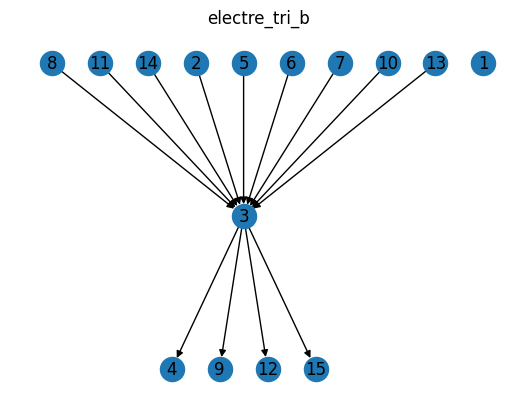

In [95]:
# visualize graph
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt

write_dot(G,'test.dot')

plt.title('electre_tri_b')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.savefig('electre_tri_b.png')

promethee1

In [87]:
INDIFFERENCE_THRESHOLDS = [200, 5, 1, 5, 3]
PREFERENCE_THRESHOLDS = [400, 10, 3, 10, 5]
criteria = [-1, 1, 1, 1, 1]
weights = [0.51, 0.28, 0.08, 0.08, 0.05]

results = promethee(alternatives, criteria, weights)
results

[['07', '05', ('04', '14'), '08', '09'],
 ['02'],
 ['01', '12'],
 ['11', '10'],
 ['03', ('04', '14'), '13', '06', '08']]

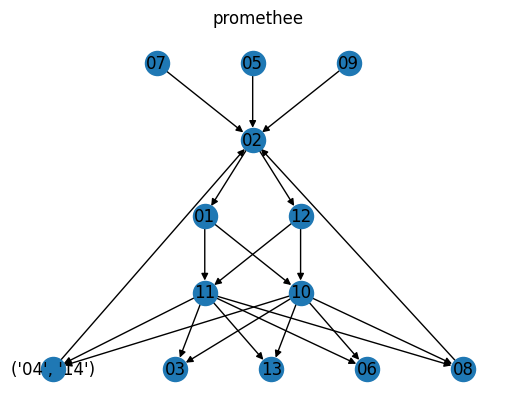

In [89]:
G = nx.DiGraph()

for i,level in enumerate(results):
    G.add_nodes_from(level)

for i,level in enumerate(results[:-1]):
    for j in level:
        for k in results[i+1]:
            G.add_edge(j,k)

write_dot(G,'test.dot')

plt.title('promethee')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.savefig('promethee.png')


promethee 2

In [82]:

INDIFFERENCE_THRESHOLDS = [200, 5, 1, 5, 3]
PREFERENCE_THRESHOLDS = [400, 10, 3, 10, 5]
criteria = [-1, 1, 1, 1, 1]
weights = [0.36, 0.28, 0.23, 0.08, 0.05]

results = promethee2(alternatives, criteria, weights)
results

{'14': 2.5635000000000003,
 '05': 1.2695000000000007,
 '07': 0.9699999999999998,
 '08': 0.4714999999999989,
 '04': 0.2214999999999998,
 '09': 0.21550000000000136,
 '13': -0.08699999999999974,
 '01': -0.2070000000000003,
 '11': -0.5185000000000008,
 '10': -0.6260000000000003,
 '02': -0.6309999999999998,
 '12': -0.7995000000000001,
 '06': -1.013,
 '03': -1.8295000000000008}

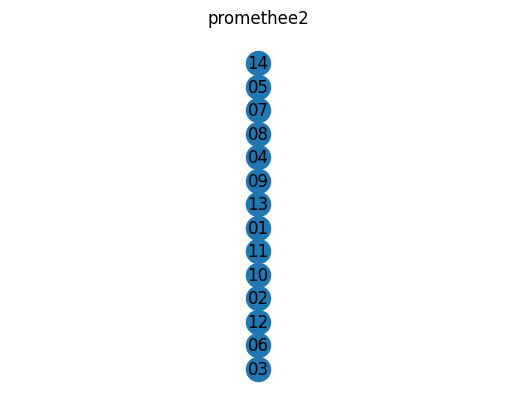

In [85]:
G = nx.DiGraph()

G.add_nodes_from(list(results.keys()))

# add edges according to results 
tuple_list_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for i in range(len(tuple_list_results)-1):
    G.add_edge(tuple_list_results[i][0],tuple_list_results[i+1][0])

# visualize graph

write_dot(G,'test.dot')
plt.title('promethee2')
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.savefig('promethee2.png')


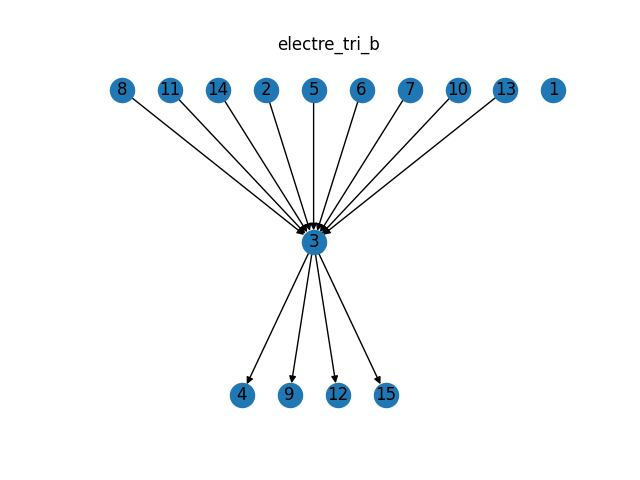

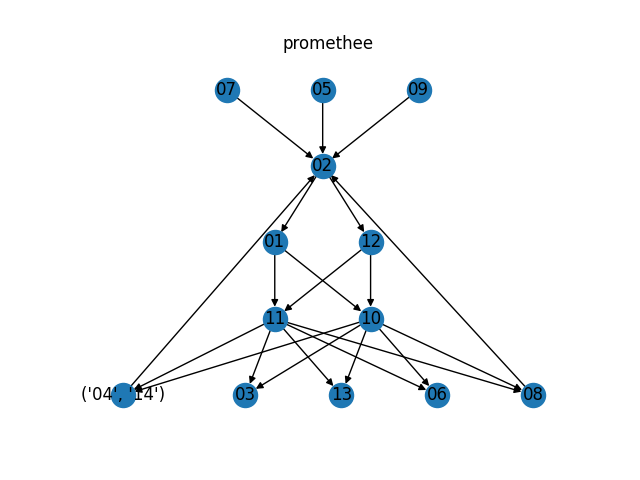

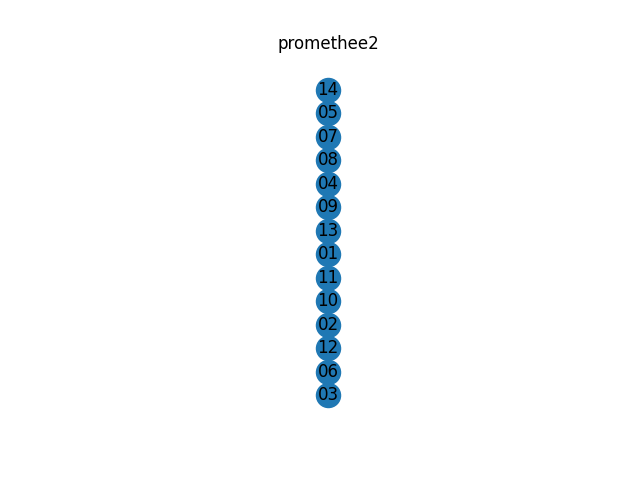

In [96]:
# show images next to each other

from IPython.display import Image, display
display(Image(filename='electre_tri_b.png'))
display(Image(filename='promethee.png'))
display(Image(filename='promethee2.png'))